<a href="https://colab.research.google.com/github/kouib123/Sklearn-Model/blob/main/copy_of_fifa_2022_match_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# FIFA 2022 World Cup Prediction


# Data Preparation
Here, I will prepare the data to apply feature engineering methods that will create the database in order to apply Machine Learning algorithms.
```
# This is formatted as code
```




In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# read the dataset
df = pd.read_csv('/content/international_plays.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,country,city,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Scotland,Glasgow,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,England,London,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Scotland,Glasgow,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,England,London,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Scotland,Glasgow,False
...,...,...,...,...,...,...,...,...,...
44153,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Qatar,Doha,True
44154,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Qatar,Doha,True
44155,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Qatar,Lusail,True
44156,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Qatar,Al Wakrah,True


In [ ]:
# convert format date to datetime
df["date"] = pd.to_datetime(df["date"])

In [ ]:
# displaying null value
df.isna().sum()

date           0
home_team      0
away_team      0
home_score    48
away_score    48
tournament     0
country        0
city           0
neutral        0
dtype: int64

In [ ]:
# drop empty columns or values
df.dropna(inplace=True)

In [ ]:
# displaying dtypes for a concise summary of the dataframe
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score           float64
away_score           float64
tournament            object
country               object
city                  object
neutral                 bool
dtype: object

In [ ]:
# displaying size of the dataframe
df.shape

(44110, 9)

In [ ]:
# get a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44110 entries, 0 to 44109
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44110 non-null  datetime64[ns]
 1   home_team   44110 non-null  object        
 2   away_team   44110 non-null  object        
 3   home_score  44110 non-null  float64       
 4   away_score  44110 non-null  float64       
 5   tournament  44110 non-null  object        
 6   country     44110 non-null  object        
 7   city        44110 non-null  object        
 8   neutral     44110 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 3.1+ MB


The dataset used will be the FIFA Games between 2018, from after the 2018 World Cup to the last games before the 2022 World Cup. The idea is to analyze just the games played at the preparation and classification to WC.

In [ ]:
# lets sort the dataframe from descending order by date to see the latest date a match has been played
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,country,city,neutral
44105,2022-11-17,Portugal,Nigeria,4.0,0.0,Friendly,Portugal,Lisbon,False
44106,2022-11-17,Switzerland,Ghana,0.0,2.0,Friendly,United Arab Emirates,Abu Dhabi,True
44107,2022-11-17,Japan,Canada,1.0,2.0,Friendly,United Arab Emirates,Dubai,True
44108,2022-11-17,Georgia,Morocco,0.0,3.0,Friendly,United Arab Emirates,Al Sharjah,True
44109,2022-11-18,Egypt,Belgium,2.0,1.0,Friendly,Kuwait,Kuwait City,True


In [ ]:
# lets analayze the games played at the preparation and qualifications to WC after WC 2018 played
df =  df[(df["date"] >= "2018-8-1")].reset_index(drop=True)

In [ ]:
from pandas.core.indexes.datetimes import date
# Retrieve the new dataframe sorted by date after WC 2018
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,country,city,neutral
3806,2022-11-17,Portugal,Nigeria,4.0,0.0,Friendly,Portugal,Lisbon,False
3807,2022-11-17,Switzerland,Ghana,0.0,2.0,Friendly,United Arab Emirates,Abu Dhabi,True
3808,2022-11-17,Japan,Canada,1.0,2.0,Friendly,United Arab Emirates,Dubai,True
3809,2022-11-17,Georgia,Morocco,0.0,3.0,Friendly,United Arab Emirates,Al Sharjah,True
3810,2022-11-18,Egypt,Belgium,2.0,1.0,Friendly,Kuwait,Kuwait City,True


In [ ]:
# Return each home team counts of unique rows in the DataFrame.
df.home_team.value_counts()

United States               45
Mexico                      42
Qatar                       40
Bahrain                     38
Japan                       38
                            ..
Tonga                        1
Bhutan                       1
Alderney                     1
Saint Helena                 1
Northern Mariana Islands     1
Name: home_team, Length: 247, dtype: int64

In [ ]:
# Import fifa ranking dataset into pandas Dataframe
import pandas as pd
rank = pd.read_csv('/content/fiffa-rankings-10-06-2022.csv')
rank

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.00,0.00,0,UEFA,12/31/1992
1,96,Syria,SYR,11.00,0.00,0,AFC,12/31/1992
2,97,Burkina Faso,BFA,11.00,0.00,0,CAF,12/31/1992
3,99,Latvia,LVA,10.00,0.00,0,UEFA,12/31/1992
4,100,Burundi,BDI,10.00,0.00,0,CAF,12/31/1992
...,...,...,...,...,...,...,...,...
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,10/6/2022
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,10/6/2022
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,10/6/2022
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,10/6/2022


In [ ]:
# Some teams in the World Cup have different names in the ranking's dataset. So, it's needed to adjust.
from pandas.core.indexes.datetimes import date
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [ ]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])

In [ ]:
#The merge is made in order to get a dataset FIFA games and its ranking
import datetime
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [ ]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [ ]:
df_wc_ranked[(df_wc_ranked.home_team == "Brazil") | (df_wc_ranked.away_team == "Brazil")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,country,city,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
2536,2021-11-11,Brazil,Colombia,1.0,0.0,FIFA World Cup qualification,Brazil,SÃ£o Paulo,False,1820.36,1811.73,2.0,0.0,1618.76,1618.40,16.0,0.0
2637,2021-11-16,Argentina,Brazil,0.0,0.0,FIFA World Cup qualification,Argentina,San Juan,False,1738.79,1725.31,6.0,0.0,1820.36,1811.73,2.0,0.0
2745,2022-01-27,Ecuador,Brazil,1.0,1.0,FIFA World Cup qualification,Ecuador,Quito,False,1448.27,1448.74,46.0,0.0,1826.35,1826.35,2.0,0.0
2778,2022-02-01,Brazil,Paraguay,4.0,0.0,FIFA World Cup qualification,Brazil,Belo Horizonte,False,1826.35,1826.35,2.0,0.0,1454.52,1454.52,43.0,0.0
2819,2022-03-24,Brazil,Chile,4.0,0.0,FIFA World Cup qualification,Brazil,Rio de Janeiro,False,1823.42,1826.35,2.0,0.0,1543.16,1543.42,26.0,2.0
2902,2022-03-29,Bolivia,Brazil,0.0,4.0,FIFA World Cup qualification,Bolivia,La Paz,False,1308.12,1324.21,76.0,-1.0,1823.42,1826.35,2.0,0.0
2994,2022-06-02,South Korea,Brazil,1.0,5.0,Friendly,South Korea,Seoul,False,1519.54,1522.85,29.0,0.0,1832.69,1823.42,1.0,-1.0
3060,2022-06-06,Japan,Brazil,0.0,1.0,Friendly,Japan,Tokyo,False,1553.44,1549.82,23.0,0.0,1832.69,1823.42,1.0,-1.0
3236,2022-09-23,Brazil,Ghana,3.0,0.0,Friendly,France,Le Havre,True,1837.56,1837.56,1.0,0.0,1393.47,1389.68,60.0,0.0
3304,2022-09-27,Brazil,Tunisia,5.0,1.0,Friendly,France,Paris,True,1837.56,1837.56,1.0,0.0,1507.86,1507.86,30.0,0.0


#Features Engineering
The idea here is to create possible features that have impact on predicting football games.

Now, we have the data ready to create features based on the games' results and FIFA rankings.



In [ ]:
#So, the first thing to do is create the feature that says which team won and how much points they made at game.
df = df_wc_ranked
df

,date,home_team,away_team,home_score,away_score,tournament,country,city,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-08-04,Belize,Barbados,1.0,0.0,Friendly,Belize,San Pedro,False,1052.00,1052.00,163.0,0.0,1059.00,1059.00,162.0,0.0
1,2018-08-04,Palestine,Iraq,0.0,3.0,Friendly,Palestine,Al-Ram,False,1449.00,1449.00,101.0,0.0,1534.00,1534.00,84.0,0.0
2,2018-08-15,Guatemala,Cuba,3.0,0.0,Friendly,Guatemala,Guatemala City,False,1263.00,1263.00,133.0,0.0,1018.00,1018.00,168.0,0.0
3,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Austria,GrÃ¶dig,True,1120.00,1120.00,130.0,0.0,1312.00,1312.00,77.0,0.0
4,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,Grenada,St. George's,False,980.00,980.00,168.0,0.0,1400.00,1400.00,54.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Norway,Oslo,False,1488.57,1488.57,36.0,0.0,1549.53,1549.53,25.0,0.0
3335,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Sweden,Stockholm,False,1563.44,1563.44,20.0,0.0,1372.48,1372.48,65.0,0.0
3336,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Kosovo,Pristina,False,1183.90,1183.90,106.0,0.0,1180.52,1180.52,108.0,1.0
3337,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Greece,Athens,False,1441.45,1441.45,49.0,1.0,1399.10,1399.10,58.0,0.0


In [ ]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [ ]:
# creating a column call results to store home and away final game results with regards to home and away team points
df[["result", "home_team_points", "away_team_points"]] = results

The game points are 3 for win, 1 for draw and 0 for lose and are different than the FIFA rank points that are already in the database. Also, it's supposed that FIFA Rank points and FIFA Ranking of the same team are negative correlated, and we should use only one of them to create new features. This supposition is checked below:

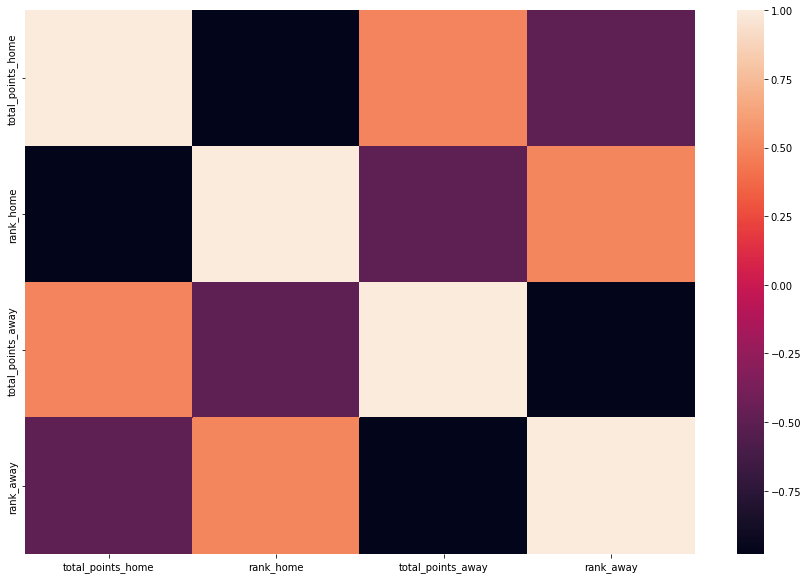

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

Now, we create columns that will help in the creation of the features: ranking difference, points won at the game vs. team faced rank, and goals difference in the game. All features that are not differences should be created for the two teams (away and home).

In [ ]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

**In order to create the features, I'll separate the dataset in home team's and away team's dataset, unify them and calculate the past game values. After that, I'll separate again and merge them, retrieving the original dataset. This proccess optimizes the creation of the features.**

In [ ]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [ ]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [ ]:
team_stats = home_team.append(away_team)#.sort_values("date")

In [ ]:
#this column will be used to calculate features for simulation
team_stats_raw = team_stats.copy()

Now, we have a database ready to create predictive features. They will be:

Mean goals of the team in World Cup Cycle.
Mean goals of the team in last 5 games.
Mean goals suffered of the team in World Cup Cycle.
Mean goals suffered of the team in last 5 games.
Mean FIFA Rank that team faced in World Cup Cycle.
Mean FIFA Rank that team faced in last 5 games.
FIFA Points won at the cycle.
FIFA Points won in last 5 games.
Mean game points at the Cycle.
Mean game points at last 5 games.
Mean game points by rank faced at the Cycle.
Mean game points by rank faced at last 5 games.

In [ ]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last10 = past_games.head(10)
    
    goals = past_games["score"].mean()
    goals_l5 = last10["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last10["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last10["rank_suf"].mean()
 
    if len(last10) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last10["total_points"].values[0] - last10["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last10["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last10["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [ ]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [ ]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [ ]:
home_team_stats

In [ ]:
#the new columns
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [ ]:
# Home and Away new columns
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [ ]:
# converting new columns to string
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In order to unify the database, is needed to add home and away suffix for each column. After that, the data is ready to be merged.

In [ ]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [ ]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [ ]:
# displaying columns
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'city', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

Now, to quantify game importance, is created a column that finds competition of the game.

In [ ]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [ ]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [ ]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'city', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [ ]:
# And, after that, we select only columns that will help in Features' analysis.
# columns selected for analysis(predictors columns)
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
3334,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1,11.0,0.0,...,1.833333,2.0,0.041984,0.059861,1.866667,2.2,0.053327,0.090846,1,0
3335,2022-09-27,Sweden,Slovenia,20.0,65.0,1.0,1.0,2,-45.0,0.0,...,1.607843,0.9,0.048520,0.020815,1.395349,1.1,0.025793,0.028775,1,0
3336,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0,-2.0,0.0,...,1.326087,1.1,0.018478,0.023040,0.767442,1.0,0.009687,0.014185,1,0
3337,2022-09-27,Greece,Northern Ireland,49.0,58.0,3.0,1.0,0,-9.0,1.0,...,1.590909,1.6,0.050090,0.021288,1.139535,1.2,0.022315,0.035183,1,0
3338,2022-09-30,Fiji,Solomon Islands,163.0,137.0,1.0,0.0,0,26.0,0.0,...,1.500000,1.2,0.009432,0.007694,1.714286,1.7,0.010013,0.009950,1,0


In [ ]:
# display null values
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  101
home_goals_mean_l5               101
home_goals_suf_mean              101
home_goals_suf_mean_l5           101
home_rank_mean                   101
home_rank_mean_l5                101
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                   99
away_goals_mean_l5                99
away_goals_suf_mean               99
away_goals_suf_mean_l5            99
away_rank_mean                    99
away_rank_mean_l5                 99
away_points_mean                   0
away_points_mean_l5                0
h

In [ ]:
# The games with NA are the ones who mean could not be calculated (games from the beginning of the dataset). Those will be dropped.
base_df_no_fg = base_df.dropna()
base_df_no_fg

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
5,2018-08-18,Guatemala,Cuba,146.0,181.0,1.0,0.0,0,-35.0,0.0,...,3.000000,3.000000,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0,1
6,2018-08-20,Barbados,Jamaica,160.0,54.0,2.0,2.0,2,106.0,0.0,...,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.017857,0.017857,0,1
7,2018-08-26,Barbados,Cuba,160.0,181.0,0.0,0.0,2,-21.0,0.0,...,0.500000,0.500000,0.009259,0.009259,0.000000,0.000000,0.000000,0.000000,0,1
9,2018-08-29,Barbados,Cuba,160.0,181.0,0.0,2.0,1,-21.0,0.0,...,0.666667,0.666667,0.008014,0.008014,0.333333,0.333333,0.002083,0.002083,0,1
35,2018-09-06,Mongolia,Guam,186.0,190.0,1.0,1.0,2,-4.0,0.0,...,3.000000,3.000000,0.016216,0.016216,0.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1,11.0,0.0,...,1.833333,2.000000,0.041984,0.059861,1.866667,2.200000,0.053327,0.090846,1,0
3335,2022-09-27,Sweden,Slovenia,20.0,65.0,1.0,1.0,2,-45.0,0.0,...,1.607843,0.900000,0.048520,0.020815,1.395349,1.100000,0.025793,0.028775,1,0
3336,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0,-2.0,0.0,...,1.326087,1.100000,0.018478,0.023040,0.767442,1.000000,0.009687,0.014185,1,0
3337,2022-09-27,Greece,Northern Ireland,49.0,58.0,3.0,1.0,0,-9.0,1.0,...,1.590909,1.600000,0.050090,0.021288,1.139535,1.200000,0.022315,0.035183,1,0


# Data Analysis
Now, we need to analyze all features that were created and check if they have predictive power. Also, if they don't have, we need to create some that have, like differences of home and away teams. To analyze the predictive power, I'll assign draw games as a lose of the home team and will create a binary problem.

In [ ]:
df = base_df_no_fg

In [ ]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Analysis that will be made:

Violin and boxplot to analyze if the features have different distributions according to the target
Scatter plots to analyze correlations

In [ ]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]

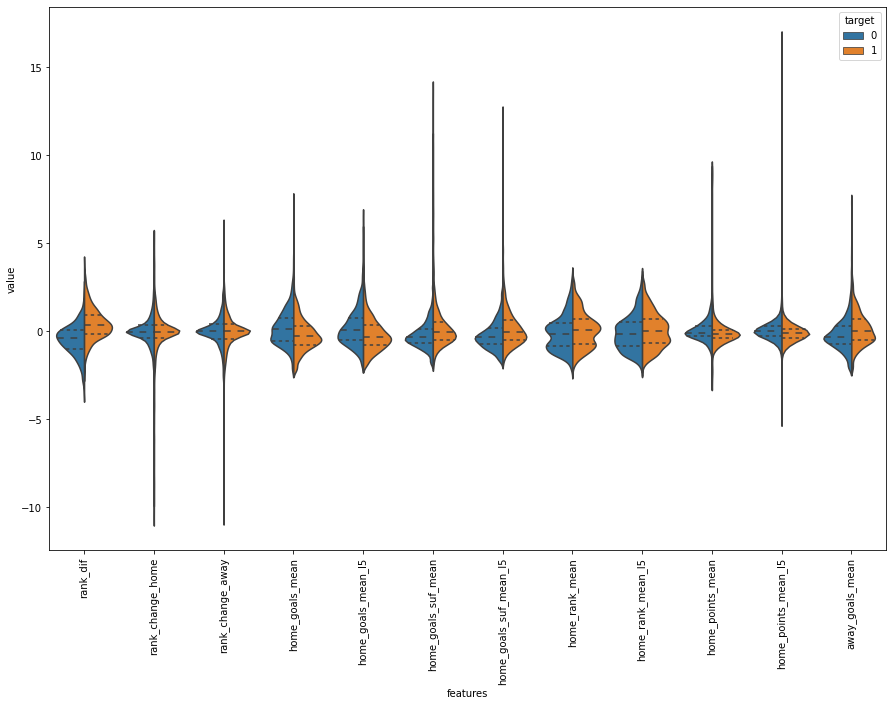

In [ ]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

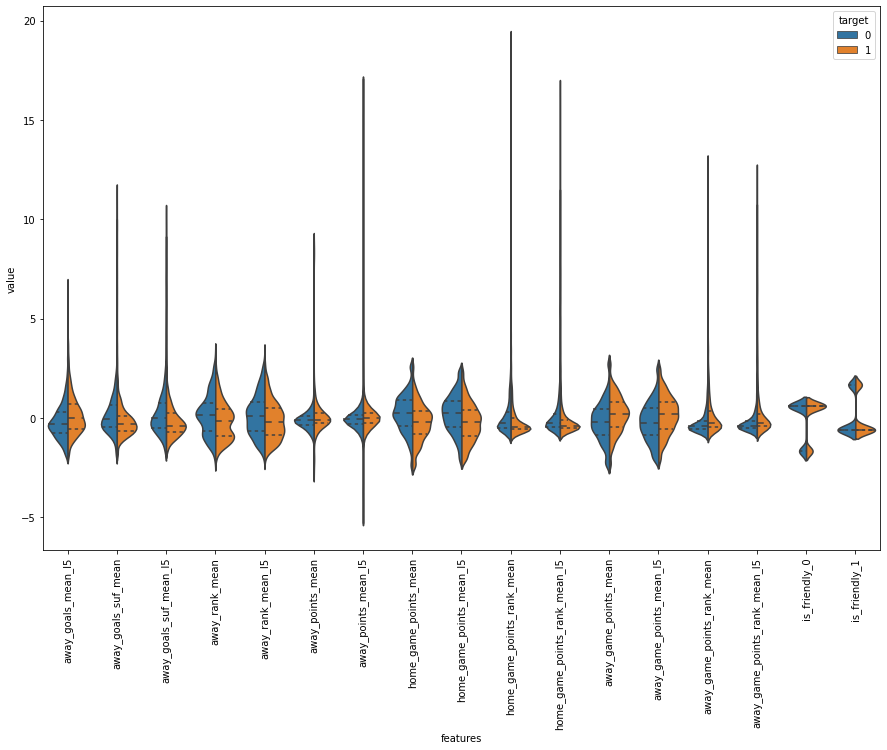

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

With the plots, we find that rank difference is the only good separator of the data. But, we can create features that get the differences between home and away team and analyze if they are good separating the data.

In [ ]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

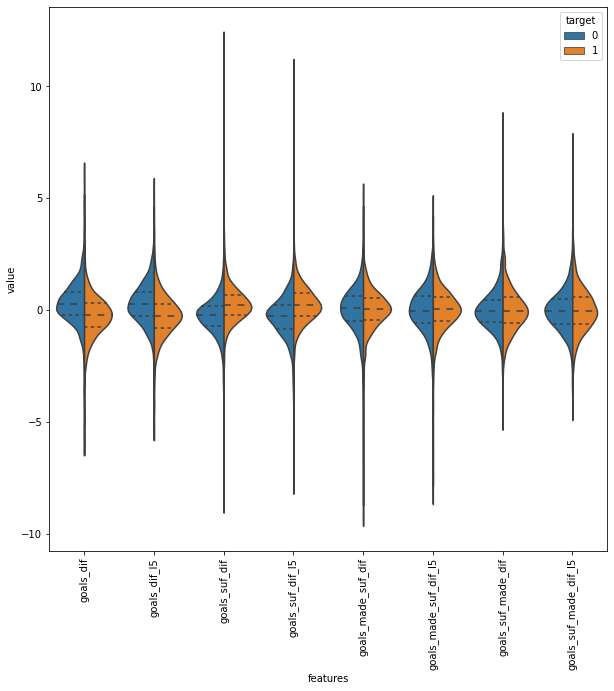

In [ ]:
data_difs = dif.iloc[:, -8:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

With that plot, we see that goal differences are good separator, and goals suffered difference too. Differences between goals made and goals suffered of the teams are not very good separators.

Now, we have 5 features:

rank_dif
goals_dif
goals_dif_l5
goals_suf_dif
goals_suf_dif_l5

We can create other features, like differences of points made, differences of points made by rank faced and differences of rank faced.

In [ ]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]

In [ ]:
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

In [ ]:
#Also, we can calculate goals made and suffered by rank, and check this difference.
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

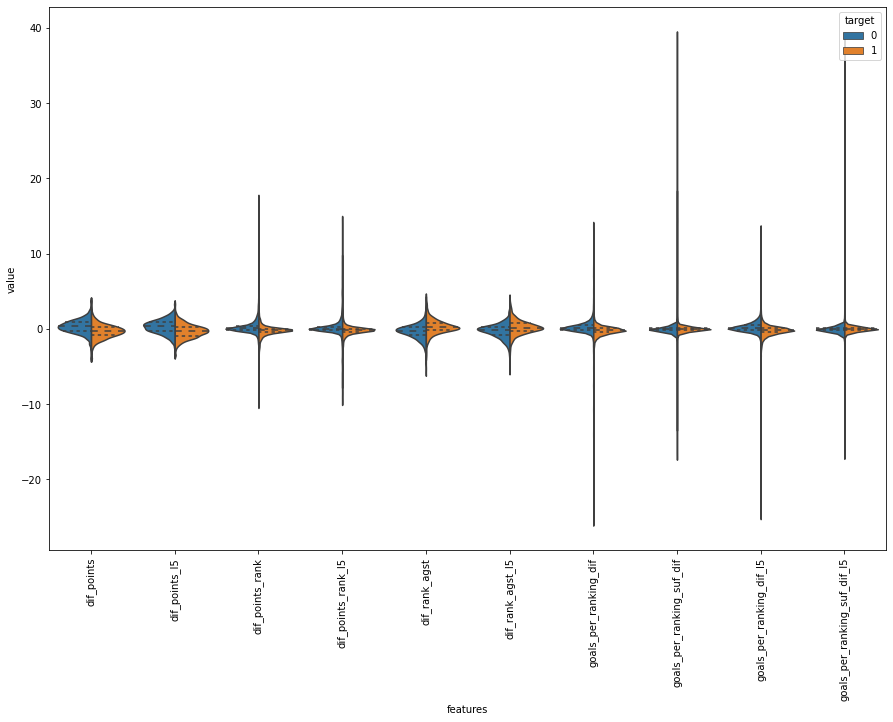

In [ ]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Due to the low values, the violin plot was not a good choice to analyze if features are really separating the data in this case. We will see then the boxplot:

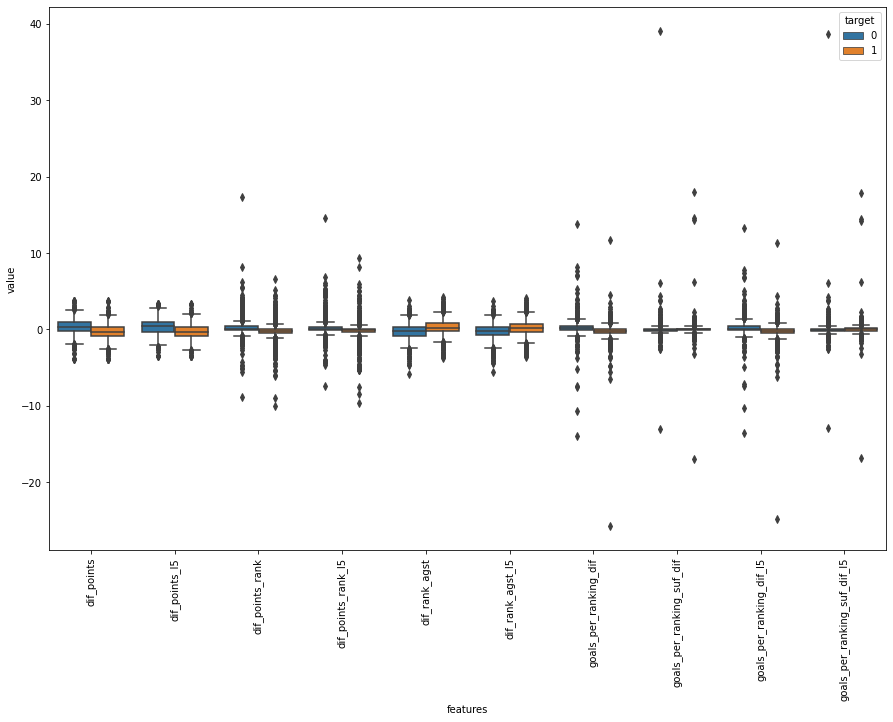

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)
plt.show()

Difference of points (full and last 10 games), difference of points by ranking faced (full and last 10 games) and difference of rank faced (full and last 10 games) are good features. Also, some of the generated features have very similar distributions which will be analyzed using scatterplots.*italicized text*



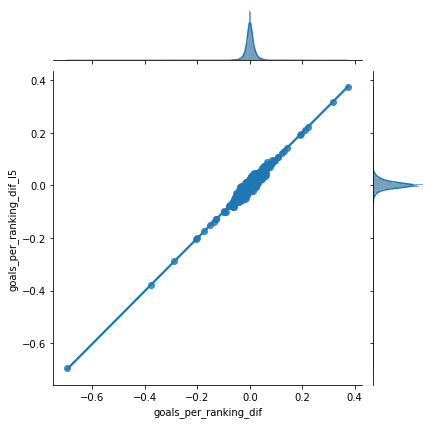

In [ ]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

'''
Goals difference by ranking faced and its last 10 games version has very similar distributions. So, we will use only the full version (goals_per_ranking_dif).
Author: **kouib123**

> Indented block



'''

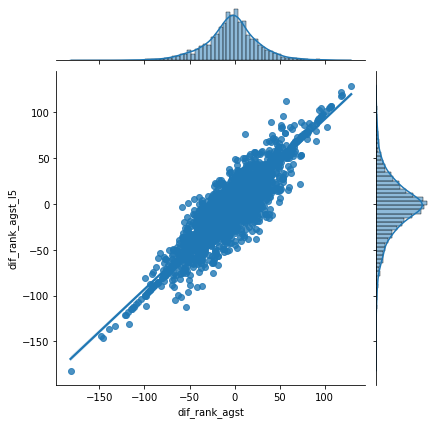

In [ ]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

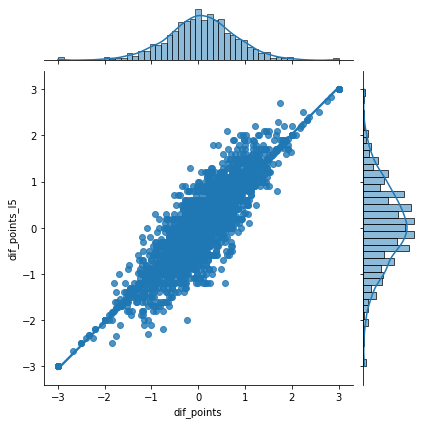

In [ ]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

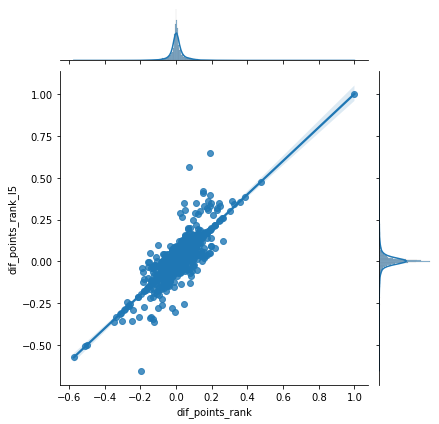

In [ ]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

For the differences of rank faced, game points by rank faced and mean game points by rank faced, the two versions (full and 10 games) are not so similar. So, we will use both.

Based on that, final features are:

rank_dif
goals_dif
goals_dif_l5
goals_suf_dif
goals_suf_dif_l5
dif_rank_agst
dif_rank_agst_l5
goals_per_ranking_dif
dif_points_rank
dif_points_rank_l5
is_friendly

In [ ]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]

    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [ ]:
model_db = create_db(df)
model_db

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
5,Guatemala,Cuba,0,-35.0,3.000000,3.000000,-3.000000,-3.000000,0.017857,35.000000,35.000000,0.017857,0.017857,0,1
6,Barbados,Jamaica,1,106.0,-5.000000,-5.000000,0.000000,0.000000,-0.029762,-5.000000,-5.000000,-0.017857,-0.017857,0,1
7,Barbados,Cuba,1,-21.0,1.000000,1.000000,-0.500000,-0.500000,0.009217,-31.000000,-31.000000,0.009259,0.009259,0,1
9,Barbados,Cuba,1,-21.0,0.666667,0.666667,-0.333333,-0.333333,0.005025,-13.666667,-13.666667,0.005931,0.005931,0,1
35,Mongolia,Guam,1,-4.0,4.000000,4.000000,-1.000000,-1.000000,0.021622,0.000000,0.000000,0.016216,0.016216,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,Norway,Serbia,1,11.0,-0.038095,-0.100000,-0.230159,-0.300000,-0.005282,9.014286,11.800000,-0.011343,-0.030986,1,0
3335,Sweden,Slovenia,1,-45.0,0.039672,-0.200000,0.137255,0.000000,0.009507,-24.814865,0.900000,0.022727,-0.007960,1,0
3336,Kosovo,Cyprus,0,-2.0,0.667341,0.600000,-0.463094,-0.400000,0.007625,7.037917,-16.900000,0.008791,0.008856,1,0
3337,Greece,Northern Ireland,0,-9.0,0.067653,-0.200000,-0.369979,-0.500000,-0.002915,16.024841,-8.300000,0.027775,-0.013895,1,0


#The model
Now **that** we have a database ready and with columns with predictive power, we can start our modelling.

Two models will be tested: Random Forest and Gradient Boosting. The selected will be the one with best recall.

In [ ]:
# Labeling my X features and Y feature in a variable
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [ ]:
# Training the model with GradientBooster
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [ ]:
# Displaying result
gb = gb_cv.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=5,
                           n_estimators=200, random_state=5)

In [ ]:
# Training Model with RandomForestClassifier
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [250]},
             verbose=False)

In [ ]:
rf = rf_cv.best_estimator_

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) 
    #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) 
    #train AUC(Area Under the Curve)-- this is what i am lookfing for to see
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

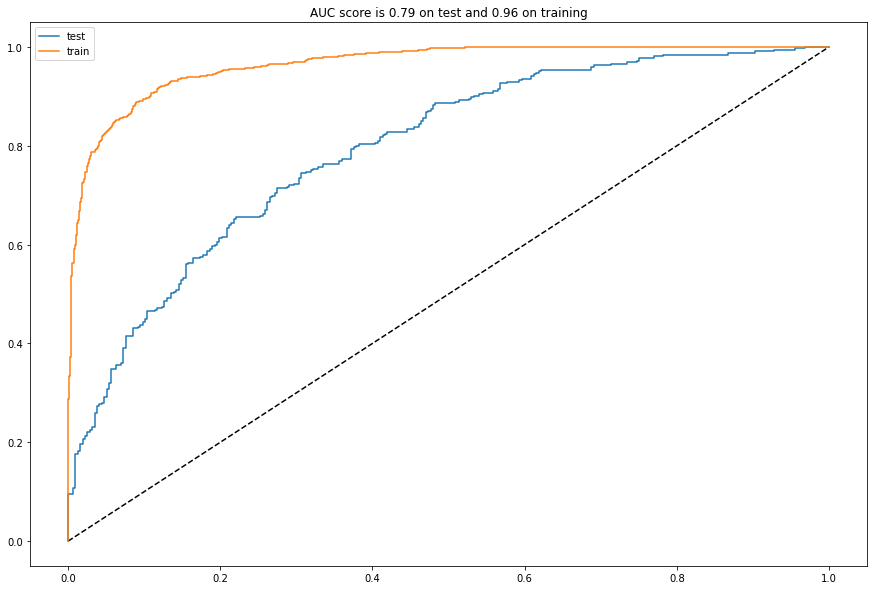

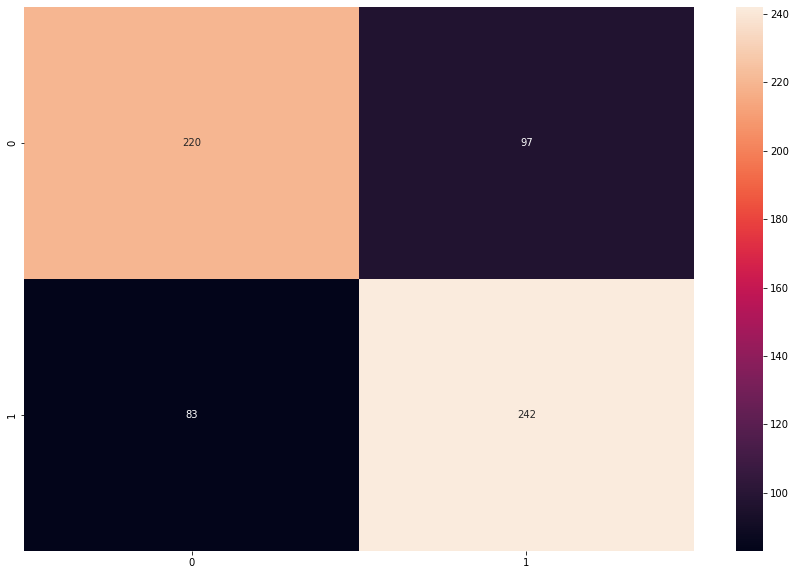

In [ ]:
analyze(rf)

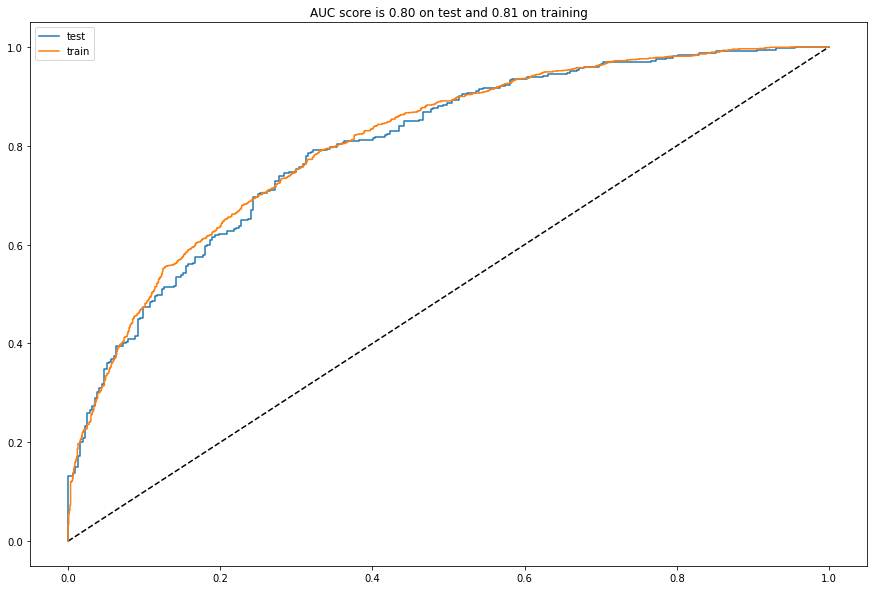

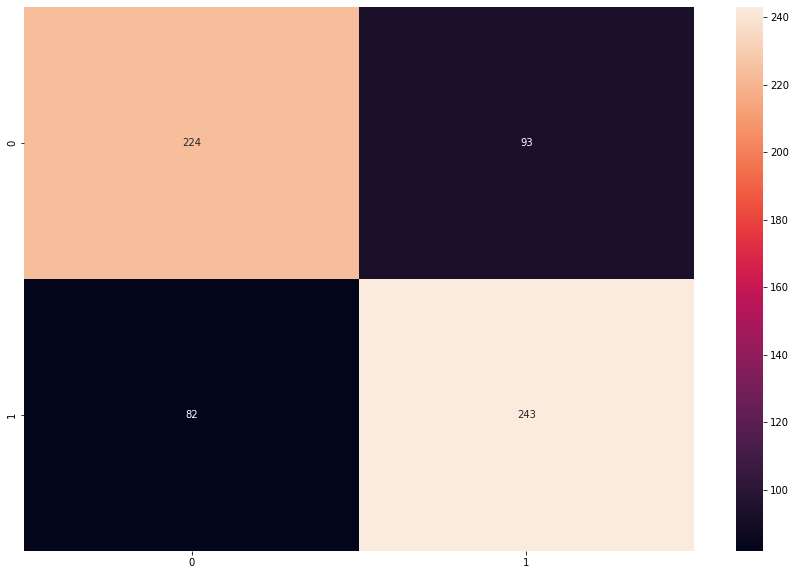

In [ ]:
analyze(gb_cv)

The Random Forest model is a little bit better but seems to underfit. So, we will use the Gradient Boosting Model.



#World Cup Simulation¶
The first thing is to create FIFA World Cup games. To do this, I'll get in the wikipedia the teams and group phase matches

In [ ]:
from operator import itemgetter
dfs = pd.read_html(r"https://en.wikipedia.org/wiki/2022_FIFA_World_Cup#Teams")

In [ ]:
from collections.abc import Iterable

for i in range(len(dfs)):
    df = dfs[i]
    cols = list(df.columns.values)
    
    if isinstance(cols[0], Iterable):
        if any("Tie-breaking criteria" in c for c in cols):
            start_pos = i+1

        if any("Match 46" in c for c in cols):
            end_pos = i+1

In [ ]:
matches = []
groups = ["A", "B", "C", "D", "E", "F", "G", "H"]
group_count = 0 

table = {}
#TABLE -> TEAM, POINTS, WIN PROBS (CRITERIO DE DESEMPATE)
table[groups[group_count]] = [[a.split(" ")[0], 0, []] for a in list(dfs[start_pos].iloc[:, 1].values)]

for i in range(start_pos+1, end_pos, 1):
    if len(dfs[i].columns) == 3:
        team_1 = dfs[i].columns.values[0]
        team_2 = dfs[i].columns.values[-1]
        
        matches.append((groups[group_count], team_1, team_2))
    else:
        group_count+=1
        table[groups[group_count]] = [[a, 0, []] for a in list(dfs[i].iloc[:, 1].values)]

In [ ]:
table

{'A': [['Netherlands', 0, []],
  ['Ecuador', 0, []],
  ['Senegal', 0, []],
  ['Qatar', 0, []]],
 'B': [['England', 0, []],
  ['Wales', 0, []],
  ['United States', 0, []],
  ['Iran', 0, []]],
 'C': [['Argentina', 0, []],
  ['Saudi Arabia', 0, []],
  ['Mexico', 0, []],
  ['Poland', 0, []]],
 'D': [['France', 0, []],
  ['Australia', 0, []],
  ['Denmark', 0, []],
  ['Tunisia', 0, []]],
 'E': [['Spain', 0, []],
  ['Costa Rica', 0, []],
  ['Germany', 0, []],
  ['Japan', 0, []]],
 'F': [['Belgium', 0, []],
  ['Canada', 0, []],
  ['Morocco', 0, []],
  ['Croatia', 0, []]],
 'G': [['Brazil', 0, []],
  ['Serbia', 0, []],
  ['Switzerland', 0, []],
  ['Cameroon', 0, []]],
 'H': [['Portugal', 0, []],
  ['Ghana', 0, []],
  ['Uruguay', 0, []],
  ['South Korea', 0, []]]}

Above, we also store the team's points at the group and its probabilities of win in each game. The mean of team's wins probabilities will be used as tiebreaker when two teams have the same number of points.

In [ ]:
#Dsiplaying the first 10 group matches
matches[:10]

[('A', 'Qatar', 'Ecuador'),
 ('A', 'Senegal', 'Netherlands'),
 ('A', 'Qatar', 'Senegal'),
 ('A', 'Netherlands', 'Ecuador'),
 ('A', 'Ecuador', 'Senegal'),
 ('A', 'Netherlands', 'Qatar'),
 ('B', 'England', 'Iran'),
 ('B', 'United States', 'Wales'),
 ('B', 'Wales', 'Iran'),
 ('B', 'England', 'United States')]

I will use last game stats as the stats for each team involved in the game. Like, for Brazil vs Serbia, the stats of Brazil is the ones they had in the last game and for Serbia too.

In [ ]:
def find_stats(team_1):
#team_1 = "Qatar"
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [ ]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

Now, we are able to simulate.

Since the model simulates if team 1 will win or not win, it's needed to create some criteria to define a draw. Also, since we have not home advantage at World Cup, the idea is to predict game two times, changing team 1 and team 2. The team with the highest mean of probabilities will be assigned as winner. At the group phase, if "home team" win as team 1 and loses as team 2, or if "home team" win as team 2 and loses at team 1, there will be assigned a draw in that match.

In [ ]:
advanced_group = []
last_group = ""

for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []
        
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    
    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = gb_cv.predict_proba([features_g1])
    probs_g2 = gb_cv.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    for i in table[teams[0]]: #adding criterio de desempate (probs por jogo)
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: "%(last_group))
            
            for i in table[last_group]: #adding crieterio de desempate
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Starting Analysis for Group %s "%(teams[0])+"-"*10)
        
        
    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
       print("Group %s - %s vs. %s: Draw"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

print("\n")
print("Group %s advanced: "%(last_group))

for i in table[last_group]: #adding crieterio de desempate
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))



---------- Starting Analysis for Group A ----------
Group A - Qatar vs. Ecuador: Winner Ecuador with 0.61 probability
Group A - Senegal vs. Netherlands: Winner Netherlands with 0.67 probability
Group A - Qatar vs. Senegal: Winner Senegal with 0.58 probability
Group A - Netherlands vs. Ecuador: Winner Netherlands with 0.71 probability
Group A - Ecuador vs. Senegal: Draw
Group A - Netherlands vs. Qatar: Winner Netherlands with 0.78 probability


Group A advanced: 
Netherlands -------- 9
Senegal -------- 4
Ecuador -------- 4
Qatar -------- 0


---------- Starting Analysis for Group B ----------
Group B - England vs. Iran: Winner England with 0.64 probability
Group B - United States vs. Wales: Draw
Group B - Wales vs. Iran: Winner Wales with 0.54 probability
Group B - England vs. United States: Winner England with 0.61 probability
Group B - Wales vs. England: Winner England with 0.66 probability
Group B - Iran vs. United States: Winner United States with 0.59 probability


Group B advanc

The group phase predicted no surprises, or maybe the draw between Brazil and Switzerland or France and Denmark. For the playoffs phase, I'll predict and show it graphicall

In [ ]:
advanced = advanced_group

In [ ]:
playoffs = {"Round of 16": [], "Quarter-Final": [], "Semi-Final": [], "Final": []}

In [ ]:
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "Round of 16":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]

        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb_cv.predict_proba([features_g1])
            probs_g2 = gb_cv.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        else:
           playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
           next_rounds = []
           for i in range(0, len(playoffs[p])):
               game = playoffs[p][i]
               home = game[0]
               away = game[1]
               team_1 = find_stats(home)
               team_2 = find_stats(away)
            
               features_g1 = find_features(team_1, team_2)
               features_g2 = find_features(team_2, team_1)
            
               probs_g1 = gb_cv.predict_proba([features_g1])
               probs_g2 = gb_cv.predict_proba([features_g2])
            
               team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
               team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2

            
               if actual_round != p:
                  print("-"*10)
                  print("Starting simulation of %s"%(p))
                  print("-"*10)
                  print("\n")
            
               if team_1_prob < team_2_prob:
                  print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                  next_rounds.append(away)
               else:
                  print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                
                  next_rounds.append(home)

               game.append([team_1_prob, team_2_prob])
               playoffs[p][i] = game
               actual_round = p

----------
Starting simulation of Round of 16
----------


Netherlands vs. United States: Netherlands advances with prob 0.59
Argentina vs. Denmark: Argentina advances with prob 0.61
Spain vs. Croatia: Spain advances with prob 0.64
Brazil vs. Uruguay: Brazil advances with prob 0.67
Senegal vs. England: England advances with prob 0.67
Mexico vs. France: France advances with prob 0.61
Germany vs. Belgium: Belgium advances with prob 0.52
Switzerland vs. Portugal: Portugal advances with prob 0.55
Netherlands vs. Argentina: Netherlands advances with prob 0.51
Spain vs. Brazil: Brazil advances with prob 0.52
England vs. France: France advances with prob 0.51
Belgium vs. Portugal: Portugal advances with prob 0.52


In [ ]:
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "Quarter-Final":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]

        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb_cv.predict_proba([features_g1])
            probs_g2 = gb_cv.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        else:
           playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
           next_rounds = []
           for i in range(0, len(playoffs[p])):
               game = playoffs[p][i]
               home = game[0]
               away = game[1]
               team_1 = find_stats(home)
               team_2 = find_stats(away)
            
               features_g1 = find_features(team_1, team_2)
               features_g2 = find_features(team_2, team_1)
            
               probs_g1 = gb_cv.predict_proba([features_g1])
               probs_g2 = gb_cv.predict_proba([features_g2])
            
               team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
               team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2

            
               if actual_round != p:
                  print("-"*10)
                  print("Starting simulation of %s"%(p))
                  print("-"*10)
                  print("\n")
            
               if team_1_prob < team_2_prob:
                  print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                  next_rounds.append(away)
               else:
                  print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                
                  next_rounds.append(home)

               game.append([team_1_prob, team_2_prob])
               playoffs[p][i] = game
               actual_round = p

----------
Starting simulation of Quarter-Final
----------


Netherlands vs. United States: Netherlands advances with prob 0.59
Argentina vs. Denmark: Argentina advances with prob 0.61
Spain vs. Croatia: Spain advances with prob 0.64
Brazil vs. Uruguay: Brazil advances with prob 0.67
Senegal vs. England: England advances with prob 0.67
Mexico vs. France: France advances with prob 0.61
Germany vs. Belgium: Belgium advances with prob 0.52
Switzerland vs. Portugal: Portugal advances with prob 0.55
Netherlands vs. Argentina: Netherlands advances with prob 0.51
Spain vs. Brazil: Brazil advances with prob 0.52
England vs. France: France advances with prob 0.51
Belgium vs. Portugal: Portugal advances with prob 0.52


In [ ]:
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "Semi-Final":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]

        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb_cv.predict_proba([features_g1])
            probs_g2 = gb_cv.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        else:
           playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
           next_rounds = []
           for i in range(0, len(playoffs[p])):
               game = playoffs[p][i]
               home = game[0]
               away = game[1]
               team_1 = find_stats(home)
               team_2 = find_stats(away)
            
               features_g1 = find_features(team_1, team_2)
               features_g2 = find_features(team_2, team_1)
            
               probs_g1 = gb_cv.predict_proba([features_g1])
               probs_g2 = gb_cv.predict_proba([features_g2])
            
               team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
               team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2

            
               if actual_round != p:
                  print("-"*10)
                  print("Starting simulation of %s"%(p))
                  print("-"*10)
                  print("\n")
            
               if team_1_prob < team_2_prob:
                  print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                  next_rounds.append(away)
               else:
                  print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                
                  next_rounds.append(home)

               game.append([team_1_prob, team_2_prob])
               playoffs[p][i] = game
               actual_round = p

----------
Starting simulation of Semi-Final
----------


Netherlands vs. United States: Netherlands advances with prob 0.59
Argentina vs. Denmark: Argentina advances with prob 0.61
Spain vs. Croatia: Spain advances with prob 0.64
Brazil vs. Uruguay: Brazil advances with prob 0.67
Senegal vs. England: England advances with prob 0.67
Mexico vs. France: France advances with prob 0.61
Germany vs. Belgium: Belgium advances with prob 0.52
Switzerland vs. Portugal: Portugal advances with prob 0.55
Netherlands vs. Argentina: Netherlands advances with prob 0.51
Spain vs. Brazil: Brazil advances with prob 0.52
England vs. France: France advances with prob 0.51
Belgium vs. Portugal: Portugal advances with prob 0.52


In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

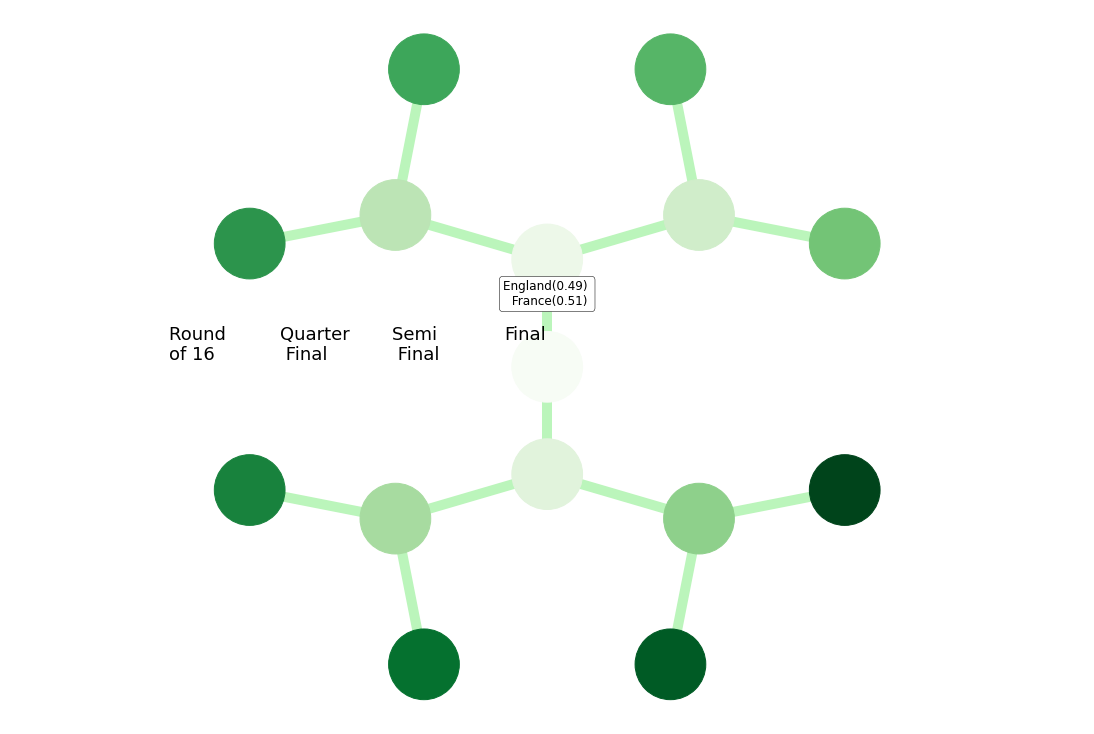

In [ ]:
plt.figure(figsize=(15, 10))
G = nx.balanced_tree(2, 3)


labels = []


for p in playoffs.keys():
    for game in playoffs[p]:
        label = f"{game[0]}({round(game[2][0], 2)}) \n {game[1]}({round(game[2][1], 2)})"
        labels.append(label)
    
labels_dict = {}
labels_rev = list(reversed(labels))

for i in range(len(list(G.nodes))):
    labels_dict[1] = labels_rev[1]

pos = graphviz_layout(G, prog='twopi')
labels_pos = {n: (k[0], k[1]-0.08*k[1]) for n,k in pos.items()}
center  = pd.DataFrame(pos).mean(axis=1).mean()
    

nx.draw(G, pos = pos, with_labels=False, node_color=range(15), edge_color="#bbf5bb", width=10, font_weight='bold',cmap=plt.cm.Greens, node_size=5000)
nx.draw_networkx_labels(G, pos = labels_pos, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=labels_dict)
texts = ["Round \nof 16", "Quarter \n Final", "Semi \n Final", "Final\n"]
pos_y = pos[0][1] + 55
for text in reversed(texts):
    pos_x = center
    pos_y -= 75 
    plt.text(pos_y, pos_x, text, fontsize = 18)

plt.axis('equal')
plt.show()

In [ ]:
# Creating team table:
team_names = ['GroupA:','Qatar','Ecuador','Senegal','Netherlands',
              'GroupB:','England','Iran','United States','Wales',
              'GroupC:','Argentina','Saudi Arabia','Mexico', 'Poland',
              'GroupD:','France','Australia','Dennmark','Tunisia',
              'GroupE:','Spain','Costa Rica','Germany','Japan',
              'GroupF:','Belgium','Canada','Morocco','Croatia',
              'GroupJ:','Brazil','Serbia','Switzerland','Cameroon',
              'GroupH:','Portugal','Ghana','Uruguay','South Korea']
team_names

['GroupA:',
 'Qatar',
 'Ecuador',
 'Senegal',
 'Netherlands',
 'GroupB:',
 'England',
 'Iran',
 'United States',
 'Wales',
 'GroupC:',
 'Argentina',
 'Saudi Arabia',
 'Mexico',
 'Poland',
 'GroupD:',
 'France',
 'Australia',
 'Dennmark',
 'Tunisia',
 'GroupE:',
 'Spain',
 'Costa Rica',
 'Germany',
 'Japan',
 'GroupF:',
 'Belgium',
 'Canada',
 'Morocco',
 'Croatia',
 'GroupJ:',
 'Brazil',
 'Serbia',
 'Switzerland',
 'Cameroon',
 'GroupH:',
 'Portugal',
 'Ghana',
 'Uruguay',
 'South Korea']